In [10]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker

# Initialize Faker for generating random names
fake = Faker()

# Define IPL teams
teams = ["Mumbai Indians", "Chennai Super Kings", "Royal Challengers Bangalore", "Delhi Capitals",
         "Sunrisers Hyderabad", "Kolkata Knight Riders", "Rajasthan Royals", "Punjab Kings",
         "Lucknow Super Giants", "Gujarat Titans"]

# Generate synthetic match data
def generate_matches(n_matches=200):
    match_data = []
    for i in range(n_matches):
        team1, team2 = random.sample(teams, 2)
        toss_winner = random.choice([team1, team2])
        toss_decision = random.choice(["Bat", "Field"])
        winner = random.choice([team1, team2])
        win_margin = random.randint(1, 60)
        player_of_match = fake.name()
        
        match_data.append([i+1, fake.date(), fake.city(), team1, team2, toss_winner, toss_decision, winner, win_margin, player_of_match])
    
    return pd.DataFrame(match_data, columns=["Match_ID", "Date", "Venue", "Team1", "Team2", "Toss_Winner", "Toss_Decision", "Winner", "Win_Margin", "Player_of_Match"])

# Generate match dataset
ipl_matches = generate_matches(200)
ipl_matches.head()


,Match_ID,Date,Venue,Team1,Team2,Toss_Winner,Toss_Decision,Winner,Win_Margin,Player_of_Match
0,1,1981-08-12,Port Kathleen,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,Field,Kolkata Knight Riders,26,Melanie Johnson
1,2,1997-10-02,South Andrew,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,Bat,Chennai Super Kings,2,Anthony Ramirez
2,3,2007-03-10,Howellhaven,Chennai Super Kings,Gujarat Titans,Chennai Super Kings,Field,Gujarat Titans,1,Amanda Dominguez
3,4,1975-07-09,East Victoria,Punjab Kings,Delhi Capitals,Punjab Kings,Bat,Punjab Kings,19,Joseph Martin
4,5,1998-04-20,East Lauraside,Mumbai Indians,Punjab Kings,Mumbai Indians,Field,Punjab Kings,9,Ashley Mcgee


C:\Users\Administrator.BW_NEHAL\AppData\Local\Temp\ipykernel_5840\4056276998.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=ipl_matches["Winner"], order=ipl_matches["Winner"].value_counts().index, palette="coolwarm")


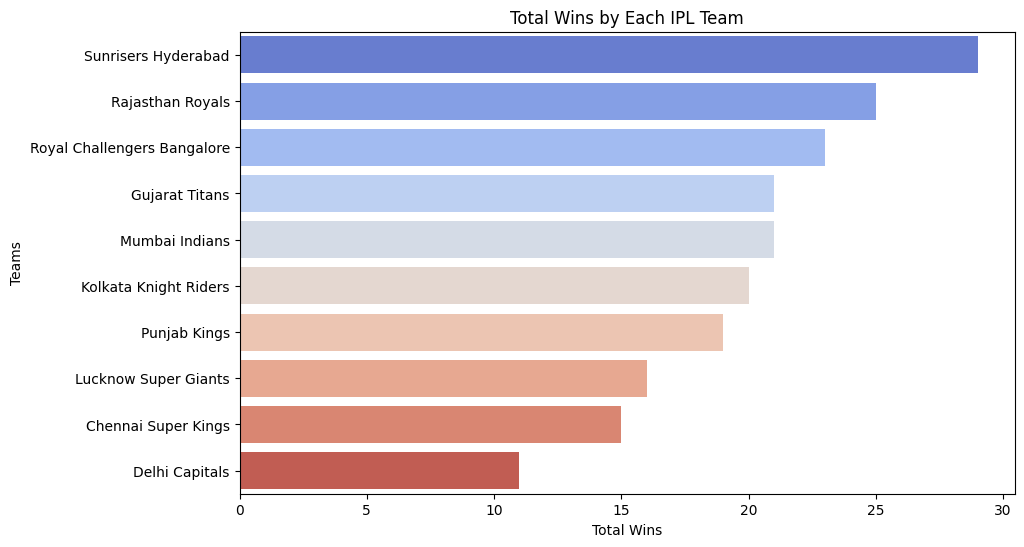

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(y=ipl_matches["Winner"], order=ipl_matches["Winner"].value_counts().index, palette="coolwarm")
plt.xlabel("Total Wins")
plt.ylabel("Teams")
plt.title("Total Wins by Each IPL Team")
plt.show()

C:\Users\Administrator.BW_NEHAL\AppData\Local\Temp\ipykernel_5840\2455728562.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=ipl_matches["Toss_Decision"], palette="pastel")


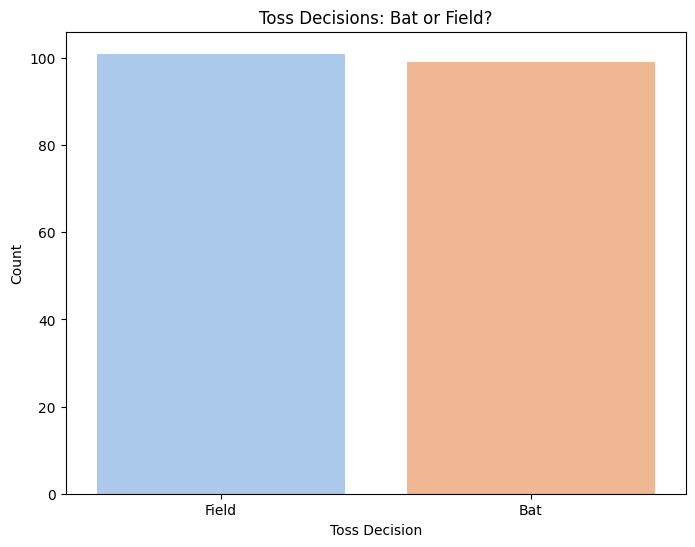

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x=ipl_matches["Toss_Decision"], palette="pastel")
plt.xlabel("Toss Decision")
plt.ylabel("Count")
plt.title("Toss Decisions: Bat or Field?")
plt.show()

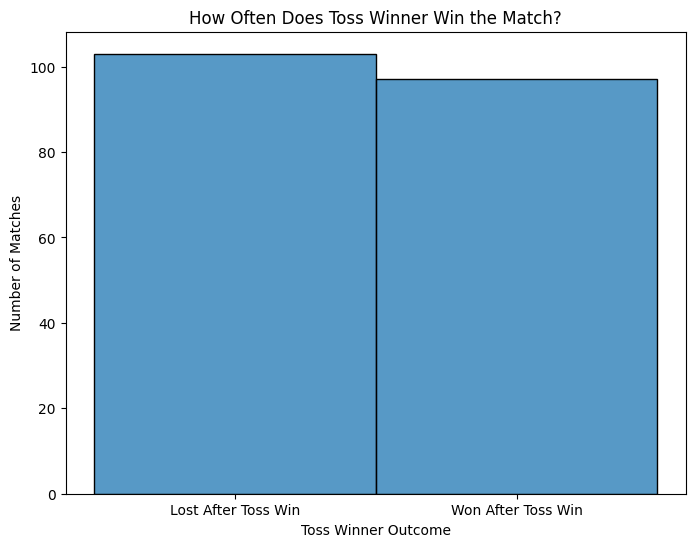

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot((ipl_matches["Toss_Winner"] == ipl_matches["Winner"]).astype(int), bins=2, kde=False, discrete=True)
plt.xticks([0, 1], ["Lost After Toss Win", "Won After Toss Win"])
plt.xlabel("Toss Winner Outcome")
plt.ylabel("Number of Matches")
plt.title("How Often Does Toss Winner Win the Match?")
plt.show()

In [14]:
players = [fake.name() for _ in range(50)]  # Generate 50 random player names
bowlers = random.sample(players, 20)  # Select some as bowlers

# Generate Ball-by-Ball Data
def generate_ball_by_ball(n_matches=200):
    ball_data = []
    for match_id in range(1, n_matches+1):
        for over in range(1, 21):  # 20 overs per match
            for ball in range(1, 7):  # 6 balls per over
                batsman = random.choice(players)
                bowler = random.choice(bowlers)
                runs = random.choices([0, 1, 2, 3, 4, 6], [0.5, 0.2, 0.1, 0.05, 0.1, 0.05])[0]  
                wicket = random.choices([0, 1], [0.9, 0.1])[0]  
                ball_data.append([match_id, over, ball, batsman, bowler, runs, wicket])
    
    return pd.DataFrame(ball_data, columns=["Match_ID", "Over", "Ball", "Batsman", "Bowler", "Runs", "Wicket"])

# Generate dataset
ipl_ball_data = generate_ball_by_ball(200)
ipl_ball_data.head()


,Match_ID,Over,Ball,Batsman,Bowler,Runs,Wicket
0,1,1,1,Matthew Mckinney,Samuel Young,0,1
1,1,1,2,Colleen Lee,Daniel Pope,0,0
2,1,1,3,Nicole Sanchez,Samuel Young,0,0
3,1,1,4,Erica Garrett,Cody Becker,4,0
4,1,1,5,George Thornton,Daniel Pope,1,1


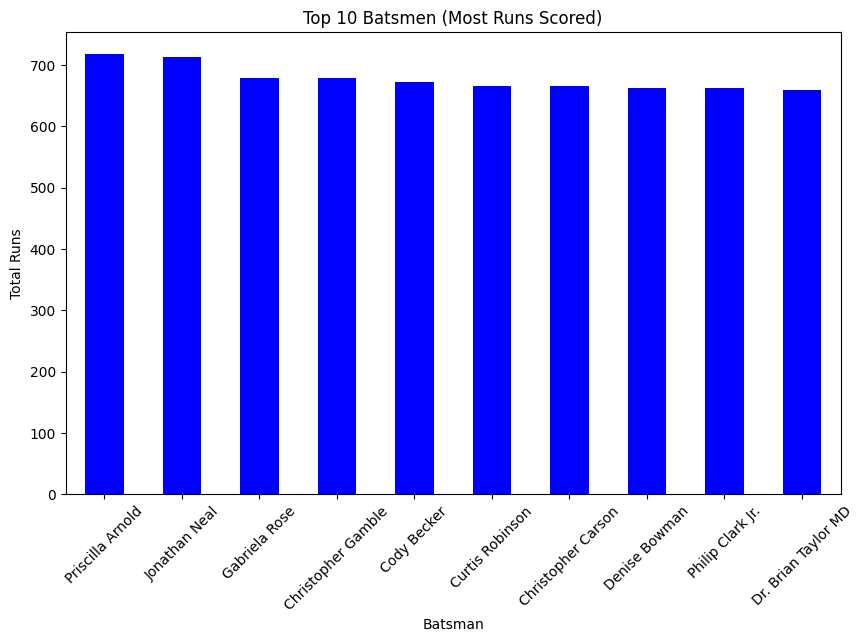

In [15]:
top_batsmen = ipl_ball_data.groupby("Batsman")["Runs"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_batsmen.plot(kind="bar", color="blue")
plt.xlabel("Batsman")
plt.ylabel("Total Runs")
plt.title("Top 10 Batsmen (Most Runs Scored)")
plt.xticks(rotation=45)
plt.show()


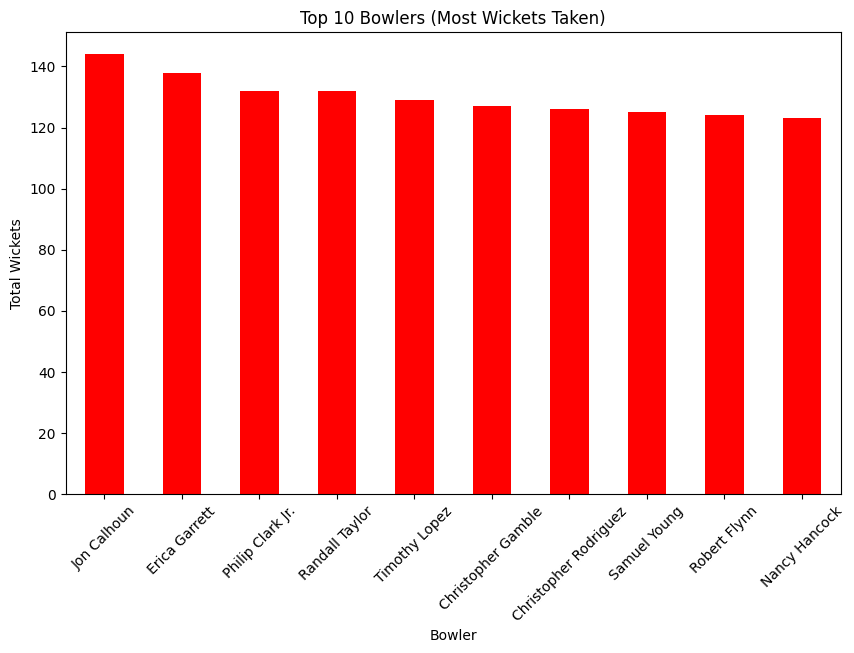

In [16]:
top_bowlers = ipl_ball_data.groupby("Bowler")["Wicket"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_bowlers.plot(kind="bar", color="red")
plt.xlabel("Bowler")
plt.ylabel("Total Wickets")
plt.title("Top 10 Bowlers (Most Wickets Taken)")
plt.xticks(rotation=45)
plt.show()


C:\Users\Administrator.BW_NEHAL\AppData\Local\Temp\ipykernel_5840\1221325747.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=ipl_ball_data["Over"], y=ipl_ball_data["Runs"], palette="coolwarm")


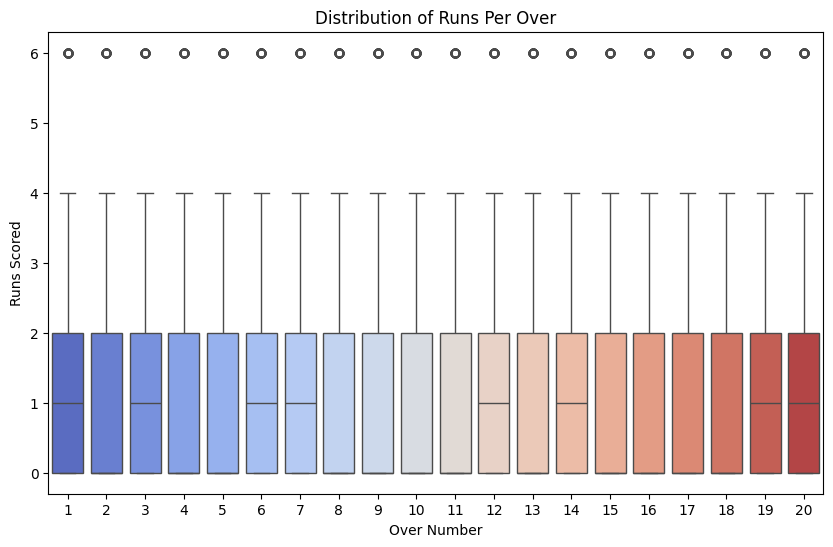

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=ipl_ball_data["Over"], y=ipl_ball_data["Runs"], palette="coolwarm")
plt.xlabel("Over Number")
plt.ylabel("Runs Scored")
plt.title("Distribution of Runs Per Over")
plt.show()


C:\Users\Administrator.BW_NEHAL\AppData\Local\Temp\ipykernel_5840\140125726.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=ipl_ball_data["Over"], y=ipl_ball_data["Wicket"], estimator="sum", ci=None, marker="o")


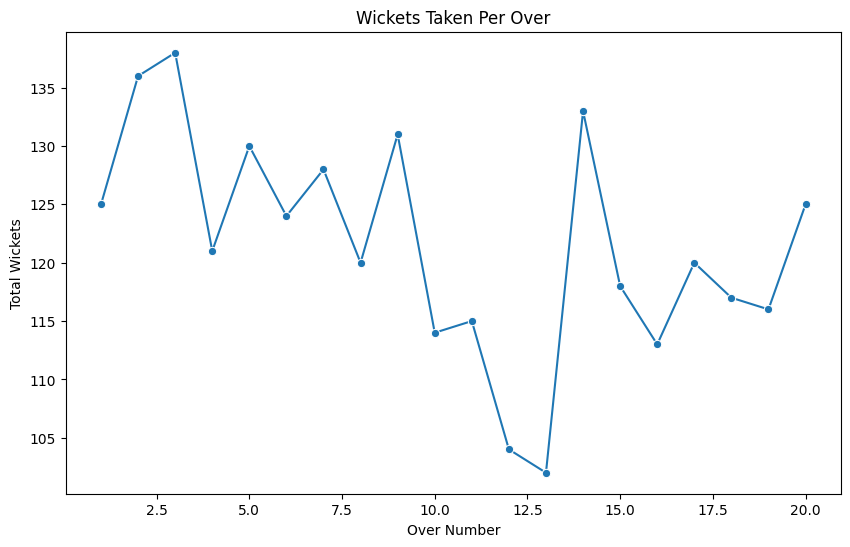

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=ipl_ball_data["Over"], y=ipl_ball_data["Wicket"], estimator="sum", ci=None, marker="o")
plt.xlabel("Over Number")
plt.ylabel("Total Wickets")
plt.title("Wickets Taken Per Over")
plt.show()
